# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

 The objective of Project is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Identify and analyze major customer segments based on transactional data from a UK-based online retail company specializing in unique all-occasion gifts occurring between 01/12/2010 and 09/12/2011.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define file paths
data_path = '/content/drive/My Drive/Unsupervised_MachineLearning/OnlineRetail.xlsx'


# Load datasets
data = pd.read_excel(data_path)


### Dataset First View

In [5]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
data.shape


(541909, 8)

### Dataset Information

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [10]:
data.duplicated().sum()

5268

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
# Calculate percentage of null values in apps_data
null_percentage = (data.isnull().sum() / len(data)) * 100
null_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

<Figure size 1000x800 with 0 Axes>

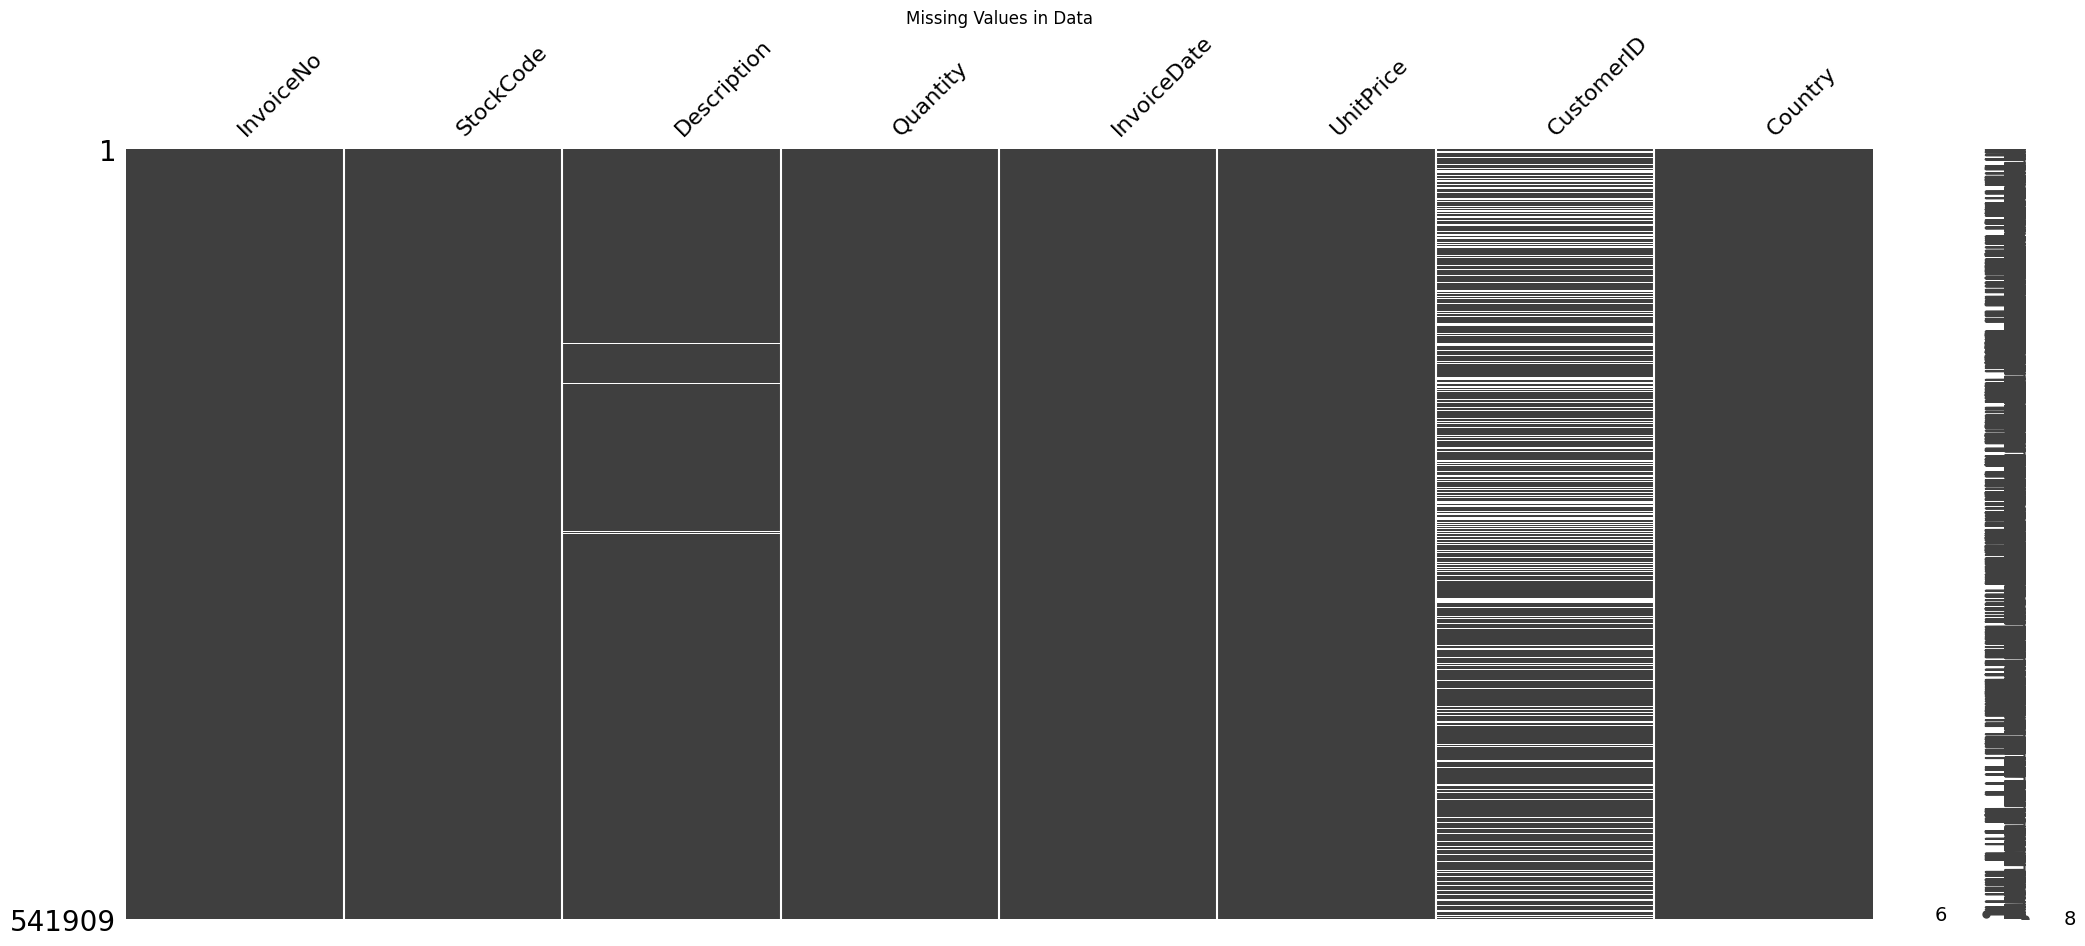

In [13]:
# Visualizing the missing values
import missingno as msno
plt.figure(figsize=(10, 8))
msno.matrix(data)
plt.title('Missing Values in Data')
plt.show()

### What did you know about your dataset?

The dataset contains 541909 rows and 8 columns. The dataset provided contains columns related to sales transactions each with varying counts of missing values.

However the "Description" column has 1,454 missing values suggesting that some products lack descriptions. Notably the "CustomerID" column has a significant number of missing values with 135,080 entries absent possibly due to transactions without customer identification such as guest checkouts or incomplete data entries.





## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [15]:
# Dataset Describe
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Variables Description

Data has the column names 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country'.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].nunique()

# Print the unique values count for each column
for column, count in unique_values.items():
    print(f"Unique values in '{column}': {count}")

Unique values in 'InvoiceNo': 25900
Unique values in 'StockCode': 4070
Unique values in 'Description': 4223
Unique values in 'Quantity': 722
Unique values in 'InvoiceDate': 23260
Unique values in 'UnitPrice': 1630
Unique values in 'CustomerID': 4372
Unique values in 'Country': 38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
# Drop duplicates
df_no_duplicates = data.drop_duplicates()

In [21]:
df_no_duplicates.duplicated().sum()

0

In [22]:
df_no_duplicates.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [23]:
df_no_duplicates.dropna(inplace = True)

<ipython-input-23-03d9665e52c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.dropna(inplace = True)


In [24]:
df_no_duplicates.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
df_no_duplicates.shape

(401604, 8)

In [26]:
df_no_duplicates.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [27]:
df_no_duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [28]:
df_no_duplicates.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [29]:
# Clean 'Country' column
df_no_duplicates['Country'] = df_no_duplicates['Country'].str.upper()

# For example, strip leading and trailing whitespace from all string columns
df1 = df_no_duplicates.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-29-282e4b059576>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['Country'] = df_no_duplicates['Country'].str.upper()


In [30]:
df1.shape

(401604, 8)

In [31]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,FRANCE
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,FRANCE
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,FRANCE
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,FRANCE


In [32]:
# Clean columns
#df['StockCode'] = df['StockCode'].str.upper()  # Convert StockCode to uppercase
df1['Description'] = df1['Description'].str.strip()  # Remove leading and trailing whitespace from Description
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])  # Convert InvoiceDate to datetime format

# Convert CustomerID to integer if it makes sense in your context
df1['CustomerID'] = df1['CustomerID'].astype('Int64')

In [33]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,FRANCE
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,FRANCE
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,FRANCE
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,FRANCE


In [34]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### What all manipulations have you done and insights you found?

I have drop the duplicate values and null values. I have also transformed all  the columns in the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [35]:
# Chart - 1 visualization code
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,FRANCE
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,FRANCE
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,FRANCE
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,FRANCE


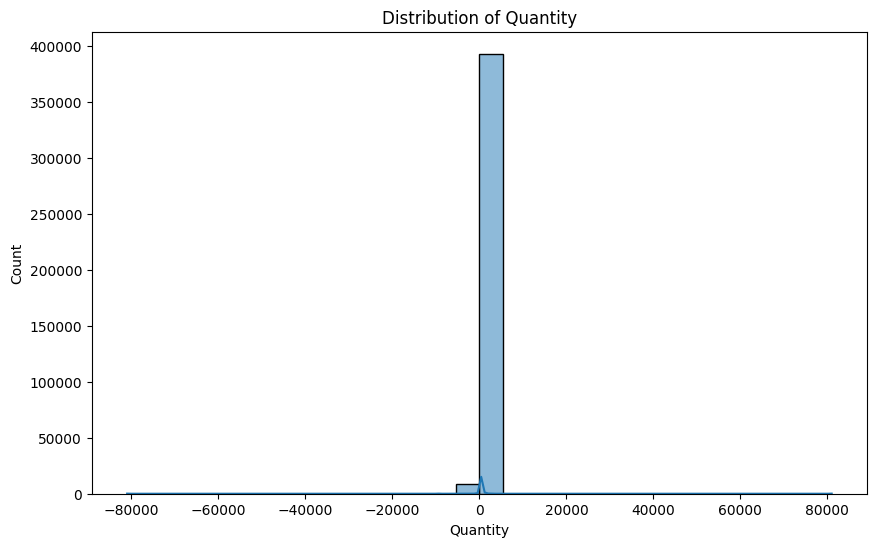

In [36]:
# Plot histogram of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Quantity', bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I have picked the histogram plot here.

##### 2. What is/are the insight(s) found from the chart?



```
# This is formatted as code
```

The histogram shows the distribution of the "Quantity" field with most values centered around zero, indicating that there are many transactions with small quantities and potentially returns (negative values).


#### Chart - 2

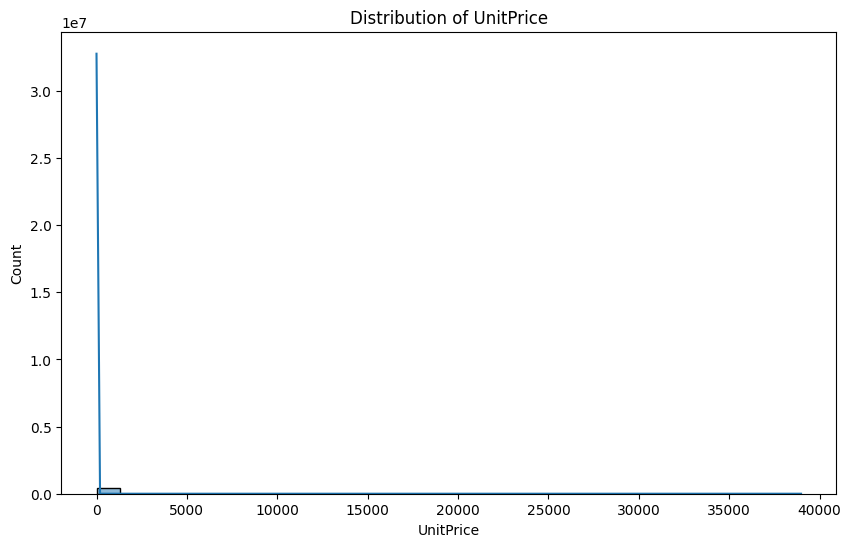

In [37]:
# Chart - 2 visualization code
# Plot histogram of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='UnitPrice', bins=30, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To visualise the distribution of Unit Price, I picked the histogram.

The histogram shows the distribution of "UnitPrice" from a dataset. Most of the values are concentrated near zero, indicating that the vast majority of items are priced low. There are a few outliers with significantly higher prices which appear infrequently. This suggests that the dataset contains many low-cost items with occasional high-priced items potentially skewing the distribution.

#### Chart - 3

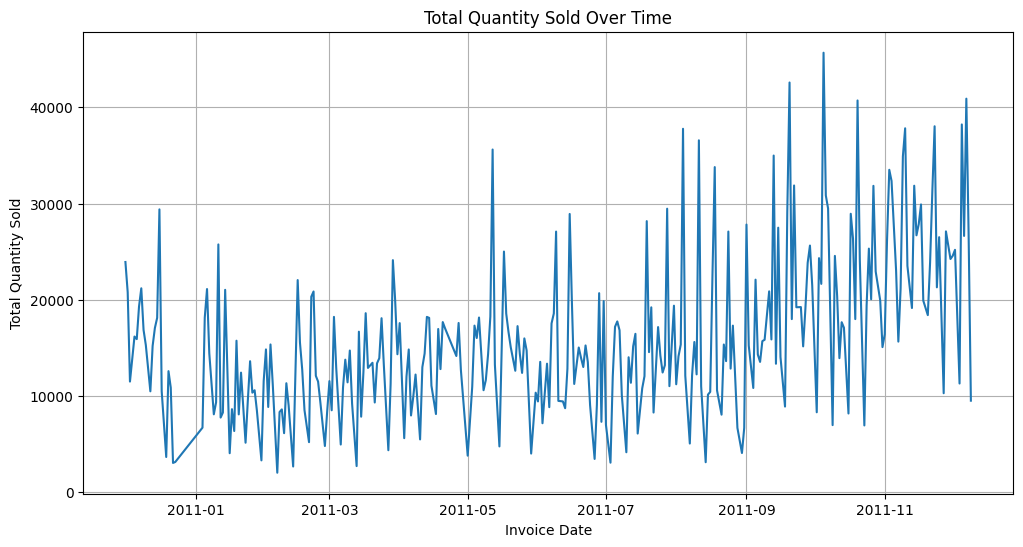

In [40]:
# Chart - 3 visualization code
# Plot line plot of Quantity over time
plt.figure(figsize=(12, 6))
df1.groupby(df1['InvoiceDate'].dt.date)['Quantity'].sum().plot()
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This Plot shows the total quantity sold over time.

##### 2. What is/are the insight(s) found from the chart?

Here, We can see the total quantity sold varies with time rigorously. The data shows fluctuating sales with significant peaks and troughs, indicating varying sales volumes on different days. There is a general trend of increasing sales over the year with several noticeable spikes where the total quantity sold exceeds 30,000 units on particular days. This suggests periods of high demand or promotional activities leading to increased sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this plot, we can give an idea that how sold quantity is varying over different months and in which month, maximum quantity  can be sold.

#### Chart - 4

<ipython-input-41-1e6876314bcc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


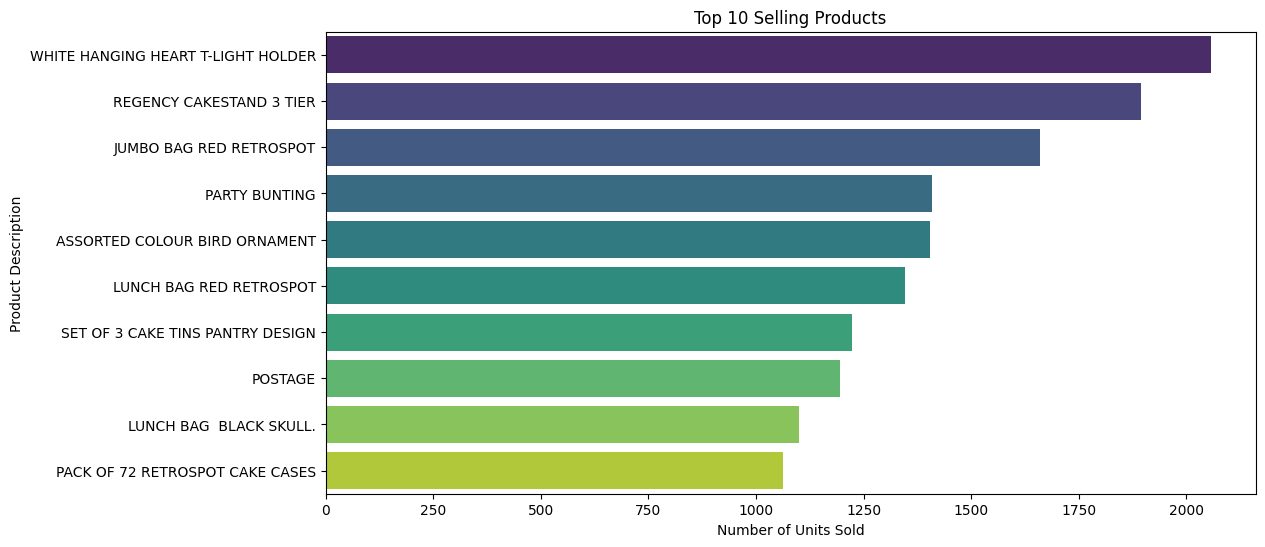

In [41]:
# Chart - 4 visualization code
# Plot bar plot of top selling products
top_products = df1['Description'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Number of Units Sold')
plt.ylabel('Product Description')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar char to visualize the categorical data.

##### 2. What is/are the insight(s) found from the chart?

This horizontal bar chart showcases the top 10 best-selling products by the number of units sold. The WHITE HANGING HEART T-LIGHT HOLDER leads with over 2,000 units sold followed by the REGENCY CAKESTAND 3 TIER. Other significant products include the JUMBO BAG RED RETROSPOT, PARTY BUNTING and ASSORTED COLOUR BIRD ORNAMENT each with substantial sales figures. The chart also features LUNCH BAG RED RETROSPOT, SET OF 3 CAKE TINS PANTRY DESIGN, POSTAGE, LUNCH BAG BLACK SKULL, and PACK OF 72 RETROSPOT CAKE CASES with sales ranging from around 1,000 to 1,500 units. This visualization highlights consumer preferences and can inform inventory and marketing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

#### Chart - 5

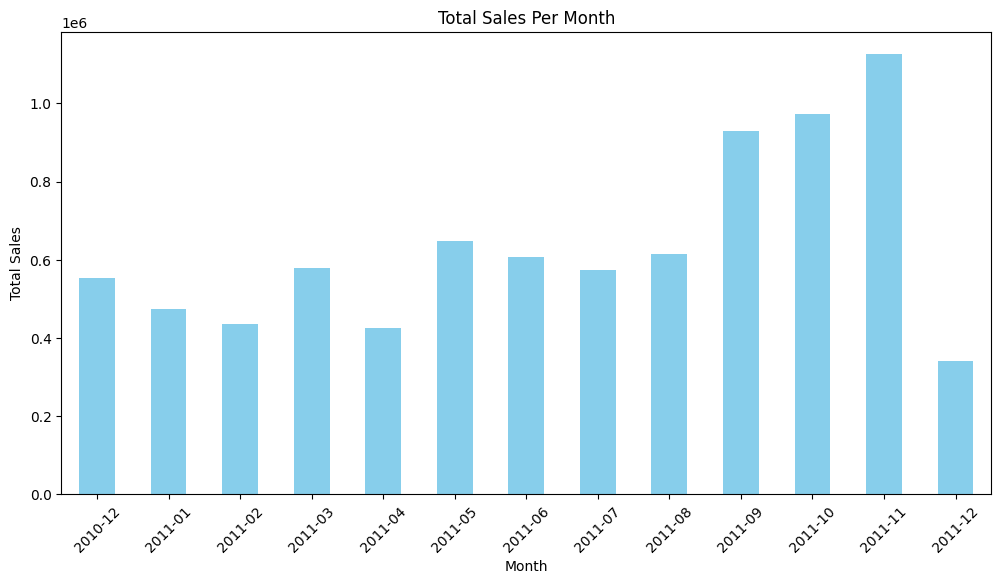

In [42]:
# Chart - 5 visualization code
# Convert 'InvoiceDate' to datetime if not already
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.to_period('M')

# Calculate total sales (Quantity * UnitPrice)
df1['TotalSales'] = df1['Quantity'] * df1['UnitPrice']

# Group by month and sum total sales
monthly_sales = df1.groupby('InvoiceMonth')['TotalSales'].sum()

# Plot bar plot of total sales per month
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I picked the bar chart to represent total sales per month.

##### 2. What is/are the insight(s) found from the chart?

Maximum sales occurs in the month of November, 2011 followed by October and September month. Minimum sales occurs in the month of December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Gained insights help creating a positive business impact.

#### Chart - 6

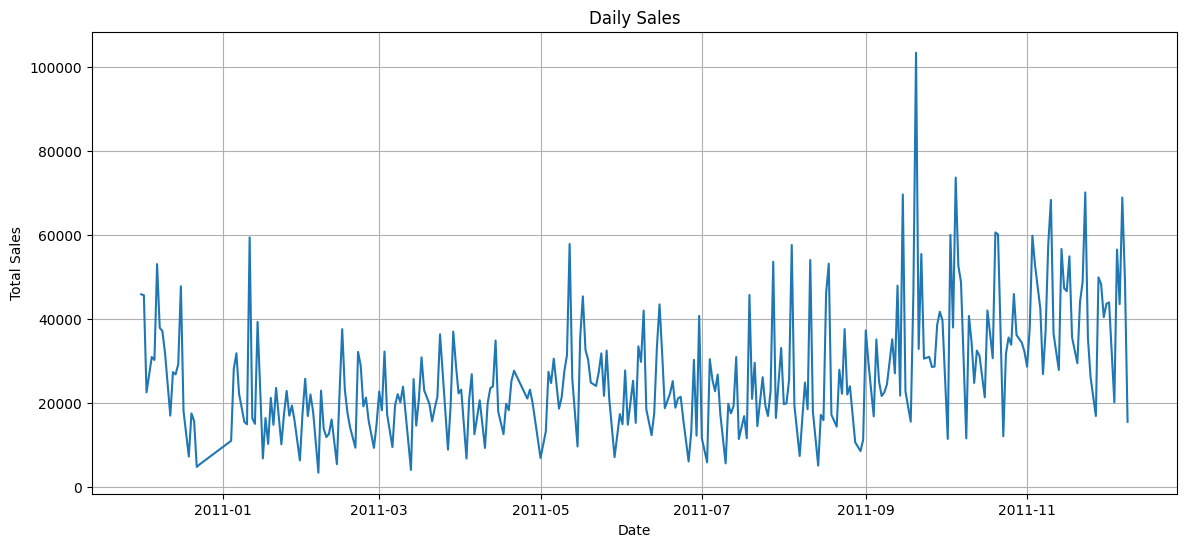

In [44]:
# Chart - 6 visualization code

# Calculate daily sales
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['InvoiceDay'] = df1['InvoiceDate'].dt.date
daily_sales = df1.groupby('InvoiceDay')['TotalSales'].sum()

# Plot time series of daily sales
plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

I have picked a line plot here to show time series visualization of daily sales.

##### 2. What is/are the insight(s) found from the chart?

Daily sales shows a rigorous plot and it shows a increased value pattern from September to October.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Gained insights help creating a positive business impact.

#### Chart - 7

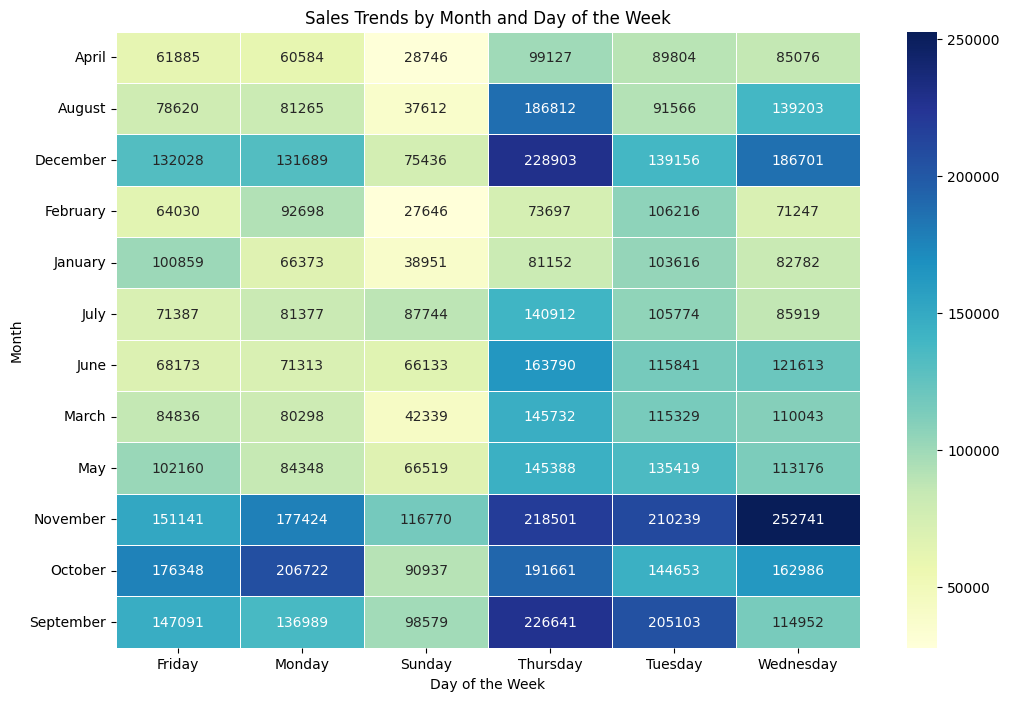

In [45]:
# Chart - 7 visualization code
# Extract month and day of the week from 'InvoiceDate'
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.month_name()
df1['InvoiceDayOfWeek'] = df1['InvoiceDate'].dt.day_name()

# Pivot table for heatmap
heatmap_data = df1.pivot_table(index='InvoiceMonth', columns='InvoiceDayOfWeek', values='TotalSales', aggfunc='sum')

# Plot heatmap of sales trends by month and day of the week
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Sales Trends by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()


##### 1. Why did you pick the specific chart?

Here, I have shown a heatmap of Pivot table of sales trends by month and day of the week.

##### 2. What is/are the insight(s) found from the chart?

 Maximum Sales occur on Wednesday in the month of November, 2011. Minimum sales occur on Sunday in the month of April.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Gained insights help creating a positive business impact. It will help in planning the strategic decisions for which month, maximum and minimum quantity will be sold.

#### Chart - 8

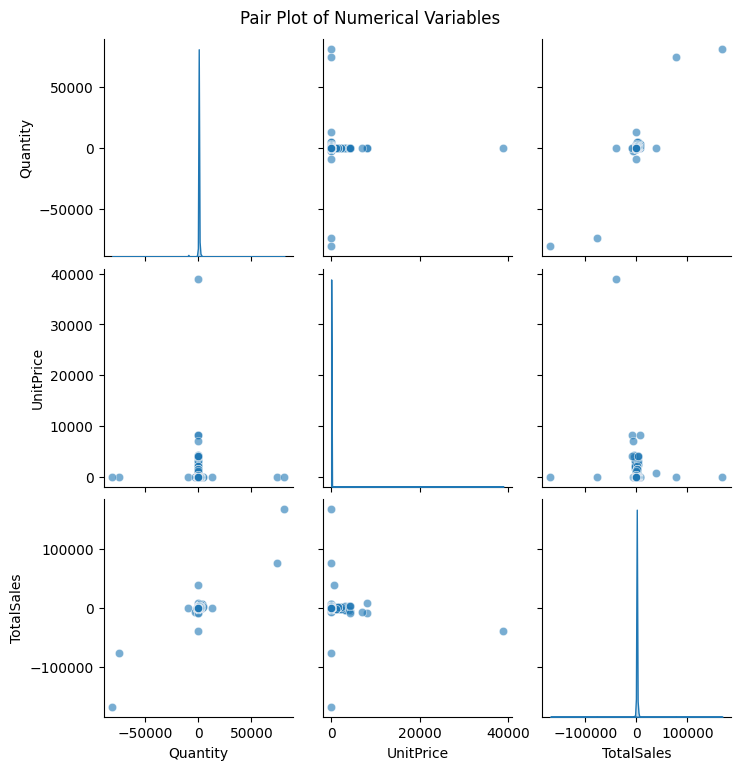

In [46]:
# Chart - 8 visualization code
# Select numerical columns for pair plot
numeric_columns = ['Quantity', 'UnitPrice', 'TotalSales']

# Plot pair plot
sns.pairplot(df1[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Here, I picked the pair plot to understand the relationship among numeric variables in the data.

##### 2. What is/are the insight(s) found from the chart?

This plot shows the nature of relationship as linear or non-linear among numeric variables in the data.

##### 3. Will the gained insights help creating a positive business impact?

---
Yes

Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 12

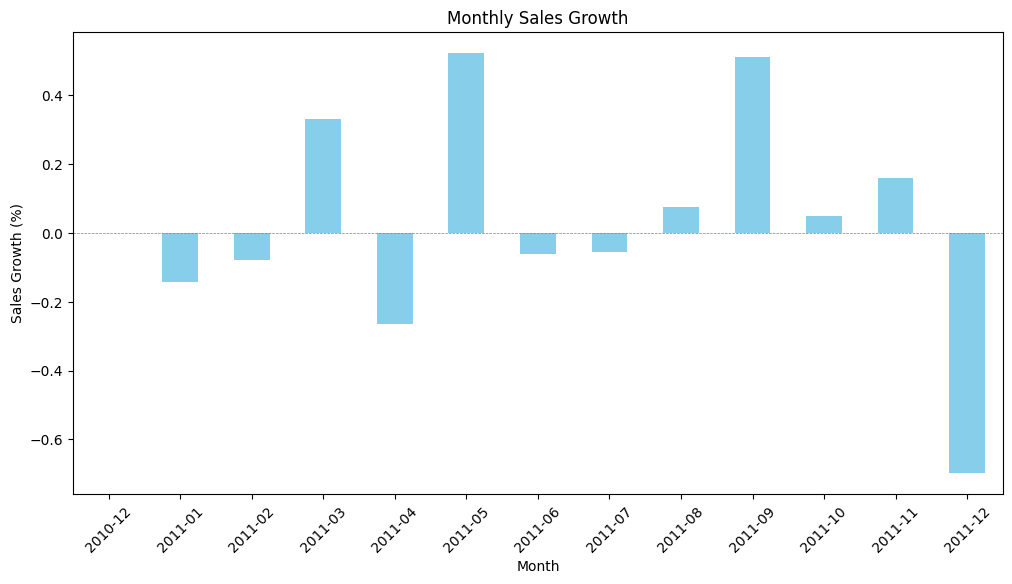

In [47]:
# Chart - 12 visualization code
# Calculate monthly sales growth
monthly_sales_growth = df1.groupby(df1['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum().pct_change()

# Plot bar plot of monthly sales growth
plt.figure(figsize=(12, 6))
monthly_sales_growth.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Growth')
plt.xlabel('Month')
plt.ylabel('Sales Growth (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)  # Add a horizontal line at 0
plt.show()


##### 1. Why did you pick the specific chart?

Here, I have picked the bar plot to show the monthly sales growth.

##### 2. What is/are the insight(s) found from the chart?

Positive monthly sales growth was reported in the September, May month and Negative positive growth occurs in the month of December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes

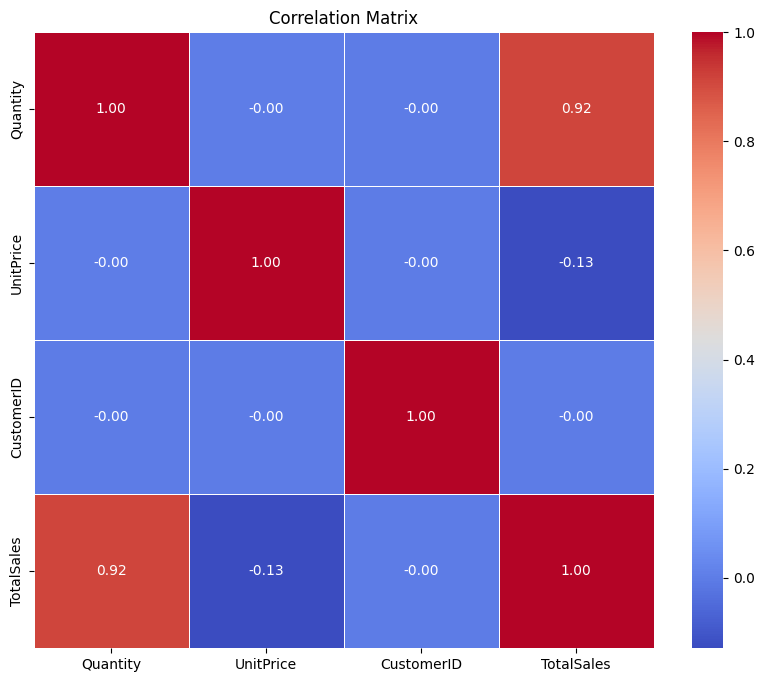

In [71]:
# Convert relevant columns to numeric (if needed)
numeric_cols = ['Quantity', 'UnitPrice', 'CustomerID', 'TotalSales']
df1[numeric_cols] = df1[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_matrix = df1[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: There is a significant difference in the average total sales between different months.

Statement 2: The average total sales on weekends (Saturday and Sunday) are higher than on weekdays.

Statement 3: The product category 'WHITE' has higher average sales compared to other categories.

In [43]:
df1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,FRANCE,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,FRANCE,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,FRANCE,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,FRANCE,2011-12,16.60


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 1: There is a significant difference in the average total sales between different months.

Null Hypothesis (H0): There is no significant difference in the average total sales between different months.

Alternative Hypothesis (H1): There is a significant difference in the average total sales between different months.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Group by month and calculate mean total sales
monthly_sales = df1.groupby('InvoiceMonth')['TotalSales'].mean()

# Extract total sales for each month
months = df1['InvoiceMonth'].unique()
sales_data = [df1[df1['InvoiceMonth'] == month]['TotalSales'] for month in months]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*sales_data)

print(f"ANOVA test results: F-statistic = {f_statistic}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average total sales between different months.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average total sales between different months.")

ANOVA test results: F-statistic = 0.6447481661457922, p-value = 0.7915647136734649
Fail to reject the null hypothesis: There is no significant difference in the average total sales between different months.


##### Which statistical test have you done to obtain P-Value?

ANOVA test

##### Why did you choose the specific statistical test?

The ANOVA (Analysis of Variance) test is appropriate for this hypothesis because it is designed to compare the means of three or more groups to determine if there is a statistically significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 2: The average total sales on weekends (Saturday and Sunday) are higher than on weekdays.

Null Hypothesis : The average total sales on weekends are not higher than on weekdays.

Alternate Hypothesis : The average total sales on weekends are higher than on weekdays.



#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
# Separate data into weekends and weekdays
weekend_sales = df1[df1['InvoiceDayOfWeek'].isin(['Saturday', 'Sunday'])]['TotalSales']
weekday_sales = df1[~df1['InvoiceDayOfWeek'].isin(['Saturday', 'Sunday'])]['TotalSales']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(weekend_sales, weekday_sales, alternative='greater')

print(f"T-test results: T-statistic = {t_statistic}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The average total sales on weekends are higher than on weekdays.")
else:
    print("Fail to reject the null hypothesis: The average total sales on weekends are not higher than on weekdays.")


T-test results: T-statistic = -5.023166939537091, p-value = 0.9999997457597538
Fail to reject the null hypothesis: The average total sales on weekends are not higher than on weekdays.


##### Which statistical test have you done to obtain P-Value?

t-test

##### Why did you choose the specific statistical test?

 Because it is specifically designed to compare the means of two groups to determine if they are significantly different from each other.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement 3: The product category 'WHITE' has higher average sales compared to other categories.

Null Hypothesis : The product category 'WHITE' does not have higher average sales compared to other categories.

Alternate Hypothesis : The product category 'WHITE' has higher average sales compared to other categories.

In [54]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalSales,InvoiceDay,InvoiceDayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM,December,15.30,2010-12-01,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,December,20.34,2010-12-01,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM,December,22.00,2010-12-01,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,December,20.34,2010-12-01,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM,December,20.34,2010-12-01,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,FRANCE,December,10.20,2011-12-09,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,FRANCE,December,12.60,2011-12-09,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,FRANCE,December,16.60,2011-12-09,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,FRANCE,December,16.60,2011-12-09,Friday


In [53]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'TotalSales',
       'InvoiceDay', 'InvoiceDayOfWeek'],
      dtype='object')

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value
# Create 'ProductCategory' column based on 'Description'
df1['ProductCategory'] = df1['Description'].apply(lambda x: 'WHITE' if 'WHITE' in x else 'Other')

# Separate data into 'WHITE' category and other categories
white_sales = df1[df1['ProductCategory'] == 'WHITE']['TotalSales']
other_sales = df1[df1['ProductCategory'] != 'WHITE']['TotalSales']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(white_sales, other_sales, alternative='greater')

print(f"T-test results: T-statistic = {t_statistic}, p-value = {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The product category 'WHITE' has higher average sales compared to other categories.")
else:
    print("Fail to reject the null hypothesis: The product category 'WHITE' does not have higher average sales compared to other categories.")

T-test results: T-statistic = 1.4389676521018466, p-value = 0.07508023368069142
Fail to reject the null hypothesis: The product category 'WHITE' does not have higher average sales compared to other categories.


##### Which statistical test have you done to obtain P-Value?

t-test

##### Why did you choose the specific statistical test?

The t-test was chosen because it is designed to compare the means of two independent groups to determine if there is a statistically significant difference between them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [56]:
# Transform Your data

customer_data = df1.groupby('CustomerID').agg({
    'TotalSales': 'sum',
    'InvoiceNo': 'count',
    'UnitPrice': 'mean'
}).reset_index()
customer_data.columns = ['CustomerID', 'TotalSpending', 'PurchaseFrequency', 'AvgUnitPrice']

### 6. Data Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpending', 'PurchaseFrequency', 'AvgUnitPrice']])

##### Which method have you used to scale you data and why?

I used the StandardScaler to standardize the features 'TotalSpending', 'PurchaseFrequency', and 'AvgUnitPrice' because it transforms the data to have a mean of zero and a standard deviation of one, ensuring that all features are on the same scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [60]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
customer_data['PCA1'] = pca_components[:, 0]
customer_data['PCA2'] = pca_components[:, 1]

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) for dimensionality reduction to transform the standardized features into a lower-dimensional space while retaining as much variance as possible from the original dataset. This is especially useful when dealing with high-dimensional data, as it makes visualization easier and can reveal underlying patterns more effectively.

## ***7. ML Model Implementation***

### ML Model - 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


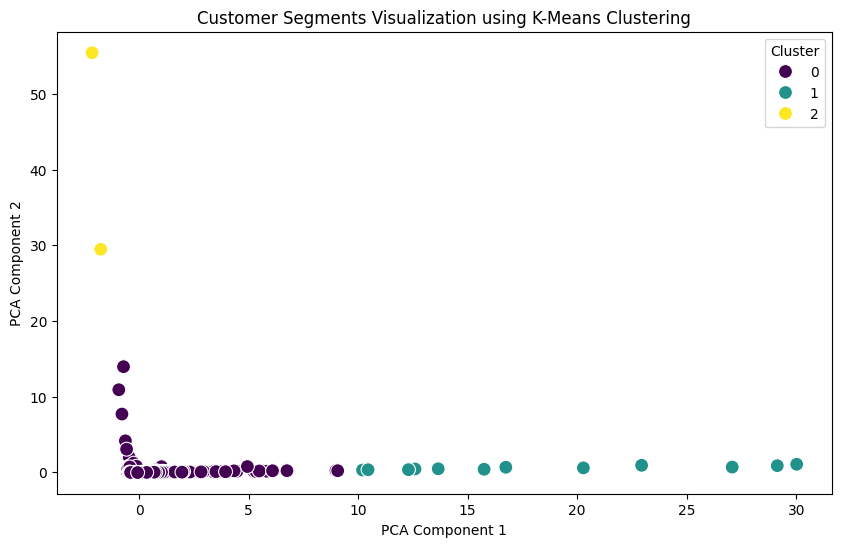

In [62]:
from sklearn.cluster import KMeans

# Fit K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments Visualization using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [63]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.9697797332924362


In [64]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
davies_bouldin_avg = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f"The average Davies-Bouldin index is: {davies_bouldin_avg}")

The average Davies-Bouldin index is: 0.6666055757378169


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means Clustering is an unsupervised learning algorithm used for clustering data points into a predefined number of clusters based on their similarity. It works by iteratively assigning data points to clusters and updating the cluster centroids until the assignments stabilize. The goal is to minimize the variance within clusters and maximize the variance between clusters.


Based on the provided evaluation metric scores:

Silhouette Score: The average silhouette score of 0.969 indicates very strong clustering performance. A score close to 1 suggests that the clusters are well-separated and distinct, with each data point being highly similar to its own cluster and dissimilar to other clusters. This high score indicates robust and well-defined clusters.

Davies-Bouldin Index: The average Davies-Bouldin index of 0.667 also suggests good clustering quality. This index measures the average similarity between each cluster and its most similar cluster, with lower values indicating better clustering. A value around 0.667 indicates that the clusters are well-separated with minimal overlap or ambiguity between clusters.

### ML Model - 2

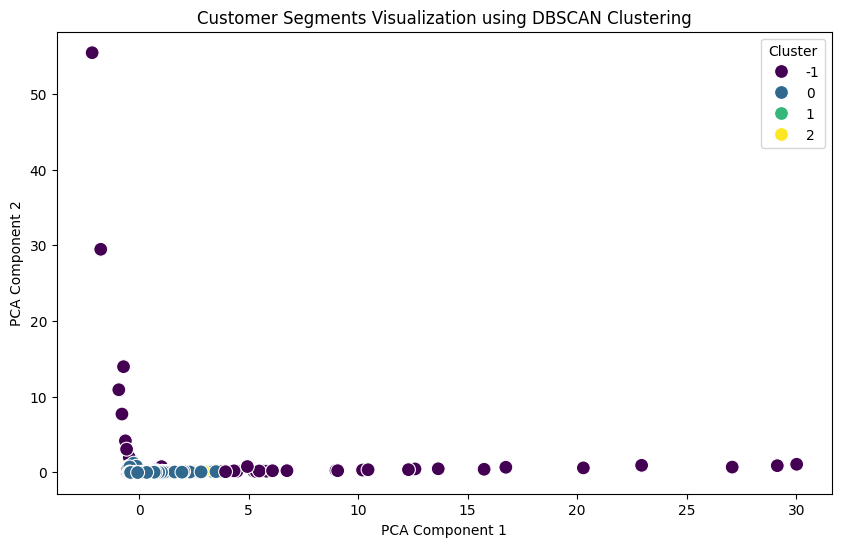

In [65]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_data['Cluster'] = dbscan.fit_predict(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments Visualization using DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [66]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.846128768695082


In [67]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index
davies_bouldin_avg = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f"The average Davies-Bouldin index is: {davies_bouldin_avg}")


The average Davies-Bouldin index is: 1.7223960681311883


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together (dense regions) and marks points that lie alone in low-density regions as outliers. It does not require the number of clusters to be specified in advance unlike K-Means.

Silhouette Score: The average silhouette score of 0.846 suggests good clustering performance. This score measures how similar each point is to its own cluster compared to other clusters. A value closer to 1 indicates well-separated clusters while values near 0 indicate overlapping clusters.

Davies-Bouldin Index: The average Davies-Bouldin index of 1.722 indicates moderate clustering quality. This index evaluates the average similarity between each cluster and its most similar cluster with lower values indicating better clustering. A value around 1.722 suggests that there is some overlap or less distinction between clusters compared to the ideal case.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen K-mean clustering algorithm as my final ML approach for the solution since its performace is better than DBSCAN.